### Set Environment

In [1]:
DATASET_NAME = "playground-series-s4e12"

In [2]:
import os
def is_kaggle_environment():
    return os.path.exists("/kaggle")
if not is_kaggle_environment():
    DATASET_PATH = f"./kaggle/input/{DATASET_NAME}"
else:
    DATASET_PATH = f"/kaggle/input/{DATASET_NAME}"

### Load Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv(f"{DATASET_PATH}/train.csv")
test = pd.read_csv(f"{DATASET_PATH}/test.csv")

NameError: name 'DATASET_PATH' is not defined

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [6]:
train.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [26]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

Checking for duplicate rows

In [27]:
train.head(3)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0


In [28]:
train['Policy Start Year'] = pd.to_datetime(train['Policy Start Date']).dt.year
train["nans"] = train.isnull().sum(axis=1)
y = train["Premium Amount"]
y_log = np.log1p(y)
train.drop(columns=["id", "Policy Start Date", "Premium Amount"], inplace=True)

In [29]:
numerical_features = train.select_dtypes(include=[int, float]).columns
categorical_features = list(train.select_dtypes(include=[object]).columns)

In [30]:
for c in categorical_features:
    print(f"{c}: {train[c].unique()}")

Gender: ['Female' 'Male']
Marital Status: ['Married' 'Divorced' 'Single' nan]
Education Level: ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation: ['Self-Employed' nan 'Employed' 'Unemployed']
Location: ['Urban' 'Rural' 'Suburban']
Policy Type: ['Premium' 'Comprehensive' 'Basic']
Customer Feedback: ['Poor' 'Average' 'Good' nan]
Smoking Status: ['No' 'Yes']
Exercise Frequency: ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type: ['House' 'Apartment' 'Condo']


In [31]:
ordinal_features = ["Education Level", "Policy Type", "Customer Feedback", "Exercise Frequency"]
categorical_features = [c for c in categorical_features if c not in ordinal_features]

ordinal_categories = [
    ['High School',"Bachelor's", "Master's", 'PhD'],
    ['Basic','Comprehensive', 'Premium'],
    ['Poor', 'Average', 'Good'],
    ['Rarely', 'Daily', 'Weekly', 'Monthly']
]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(train, y_log, test_size=0.2, random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import numpy as np
import catboost

numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

ordinal_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

model = catboost.CatBoostRegressor(iterations=5000, random_seed=42, verbose=False)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model),
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Year', 'nans'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(st...
                                                                   OrdinalEncoder(categories=[['High '
                                                                                               'School',
                                                                                               "Bachelor's",
                                                                                               "Master's",
                                                                                               'PhD'],
                                                                                              ['Basic',
                                                                                               'Comprehensive',
                                                                                               'Premium'],
                                                                                              ['Poor',
                                                                                               'Average',
                                                                                               'Good'],
                                                                                              ['Rarely',
                                                                                               'Daily',
                                                                                               'Weekly',
                                                                                               'Monthly']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Education Level',
                                                   'Policy Type',
                                                   'Customer Feedback',
                                                   'Exercise Frequency'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7a3654e938c0>)])

In [36]:
pipeline.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Year', 'nans'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(st...
                                                                   OrdinalEncoder(categories=[['High '
                                                                                               'School',
                                                                                               "Bachelor's",
                                                                                               "Master's",
                                                                                               'PhD'],
                                                                                              ['Basic',
                                                                                               'Comprehensive',
                                                                                               'Premium'],
                                                                                              ['Poor',
                                                                                               'Average',
                                                                                               'Good'],
                                                                                              ['Rarely',
                                                                                               'Daily',
                                                                                               'Weekly',
                                                                                               'Monthly']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Education Level',
                                                   'Policy Type',
                                                   'Customer Feedback',
                                                   'Exercise Frequency'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7a3654e938c0>)])

In [37]:
y_pred_log = pipeline.predict(X_test)


In [38]:
# RMSLE
from sklearn.metrics import root_mean_squared_log_error

rmsle_test = root_mean_squared_log_error(np.expm1(y_test_log), np.expm1(y_pred_log))

print(f"RMSLE test: {rmsle_test}")

RMSLE test: 1.0527301929019313


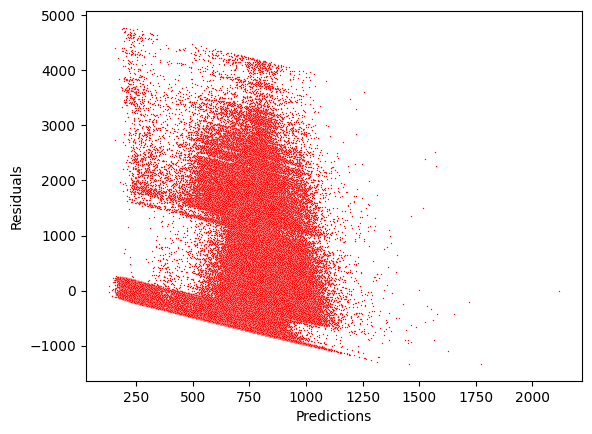

In [39]:
# Plot residuals
import seaborn as sns
import matplotlib.pyplot as plt
test_residuals = np.expm1(y_test_log) - np.expm1(y_pred_log)

sns.scatterplot(x=np.expm1(y_pred_log), y=test_residuals, color='red', s=1)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

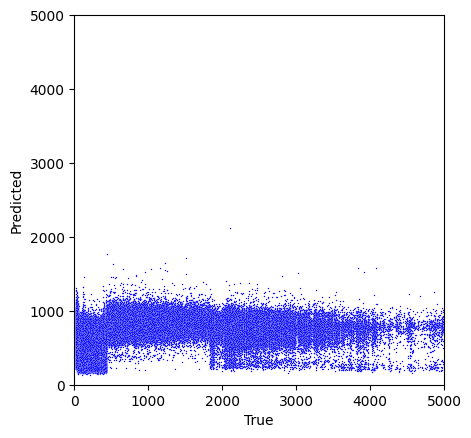

In [40]:
# True vs Predicted

sns.scatterplot(x=np.expm1(y_test_log), y=np.expm1(y_pred_log), color='blue', s=1)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.show()

In [41]:
# Test set prediction

test["Policy Start Year"] = pd.to_datetime(test["Policy Start Date"]).dt.year
test["nans"] = test.isnull().sum(axis=1)
test["Premium Amount"] = pipeline.predict(test.drop(columns=["Policy Start Date", "id"]))
submission = test[["id", "Premium Amount"]]
submission.to_csv("submission.csv", index=False)
submission.head()

,id,Premium Amount
0,1200000,6.721624
1,1200001,6.749702
2,1200002,6.662924
3,1200003,6.693223
4,1200004,6.593083
